# Model for Cardiovascular (CVD) Risk Prediction 

## Cardiovascular Disease dataset

The dataset consists of 70,000 records of patients data, 11 features + target

In [294]:
import numpy as np
import pandas as pd

In [295]:
df = pd.read_csv('cardio_train.csv')

In [296]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [298]:
ids = df['id'].copy()

In [299]:
df.drop('id', axis=1, inplace=True)

In [300]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>],
       [<Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>,
        <Axes: title={'center': 'cardio'}>]], dtype=object)

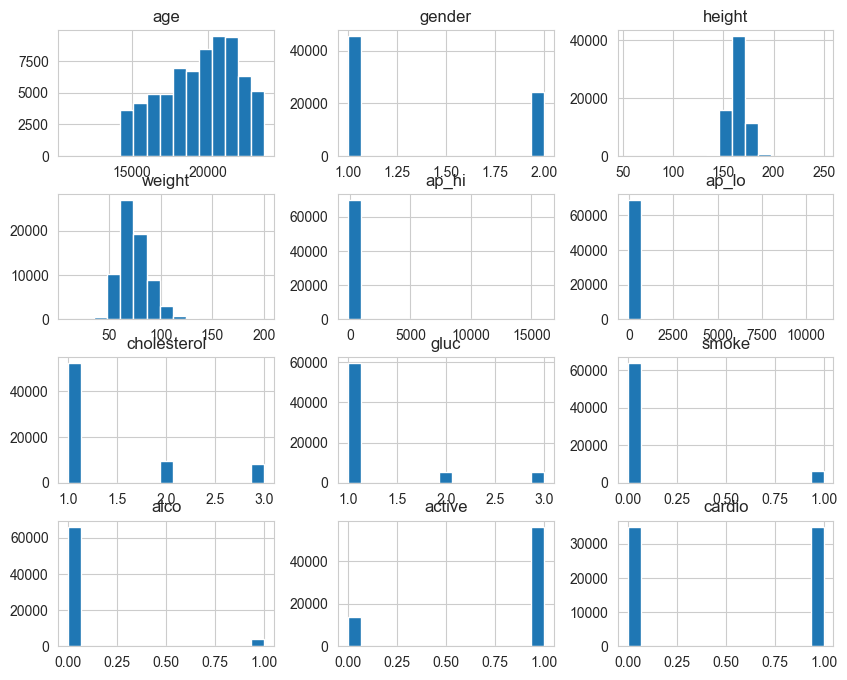

In [301]:
df.hist(bins=15, figsize=(10,8))

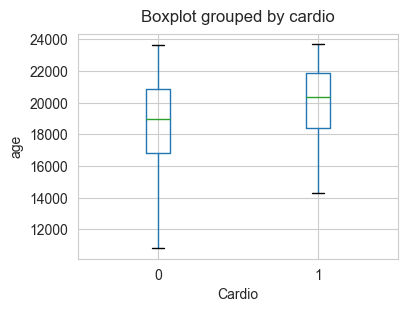

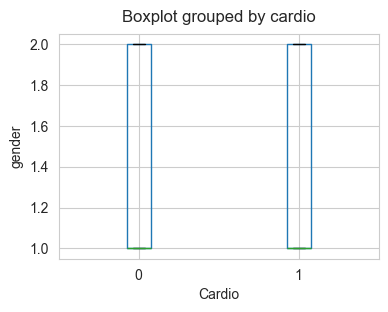

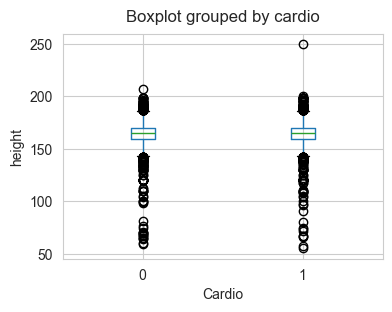

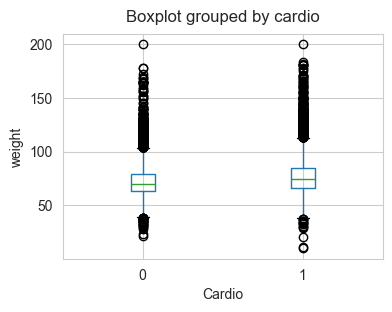

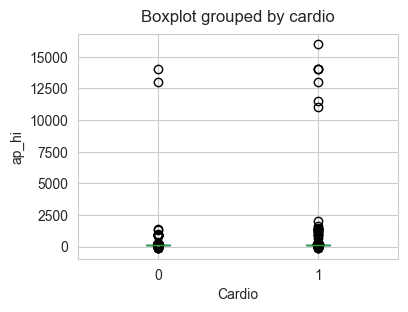

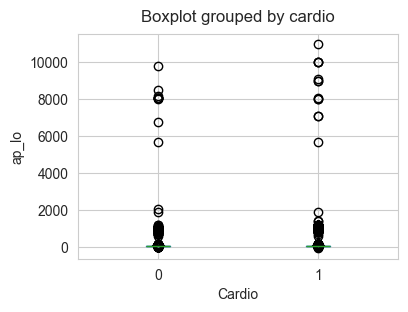

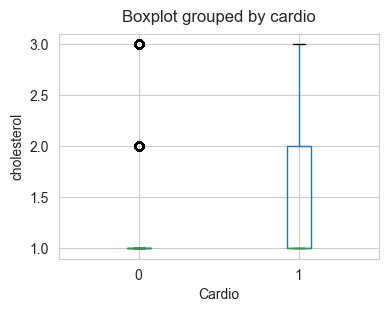

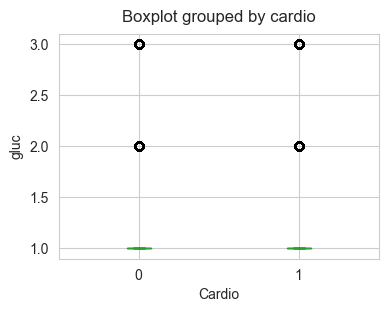

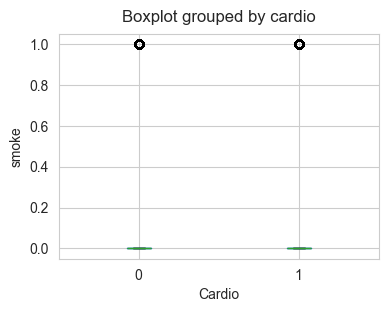

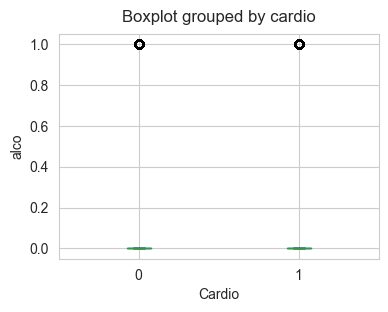

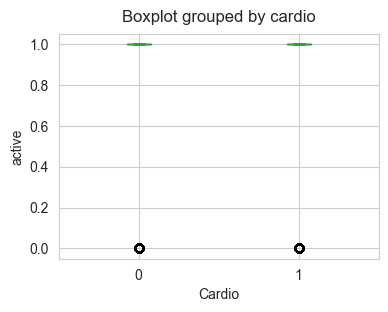

In [302]:
import matplotlib.pyplot as plt
for col in df.columns[:-1]:
  # Create a new figure for each boxplot
  df.boxplot(column=col, by='cardio', figsize=(4, 3))
  plt.title('')
  plt.xlabel("Cardio")
  plt.ylabel(col)
  plt.grid(True)
  plt.show()

In [303]:
def remove_outliers(df, factor):
    for column in ['ap_hi', 'ap_lo', 'weight', 'height']:
        upper_lim = df[column].mean() + df[column].std() * factor
        lower_lim = df[column].mean() - df[column].std() * factor

        # Remove outliers
        df = df[(df[column] < upper_lim) & (df[column] > lower_lim)]
        print(df.shape)
    return df



In [304]:
df_cleaned = remove_outliers(df.copy(), factor=2)

(69962, 12)
(69009, 12)
(65873, 12)
(63661, 12)


In [305]:
df[['ap_hi', 'ap_lo', 'weight', 'height']] = df_cleaned[['ap_hi', 'ap_lo', 'weight', 'height']]

In [306]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168.0,62.0,110.0,80.0,1,1,0,0,1,0
1,20228,1,156.0,85.0,140.0,90.0,3,1,0,0,1,1
2,18857,1,165.0,64.0,130.0,70.0,3,1,0,0,0,1
3,17623,2,169.0,82.0,150.0,100.0,1,1,0,0,1,1
4,17474,1,156.0,56.0,100.0,60.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168.0,76.0,120.0,80.0,1,1,1,0,1,0
69996,22601,1,NaN,NaN,NaN,NaN,2,2,0,0,1,1
69997,19066,2,NaN,NaN,NaN,NaN,3,1,0,1,0,1
69998,22431,1,163.0,72.0,135.0,80.0,1,2,0,0,0,1


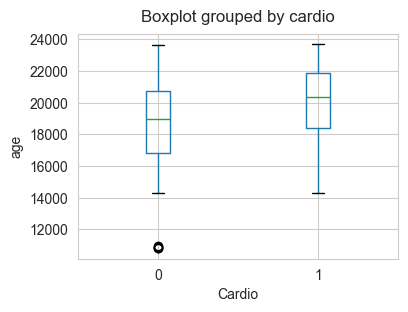

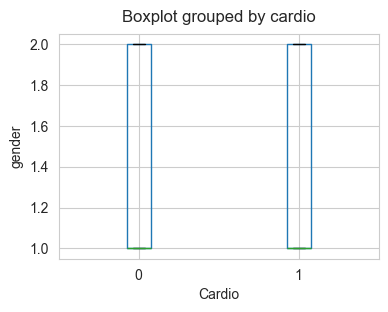

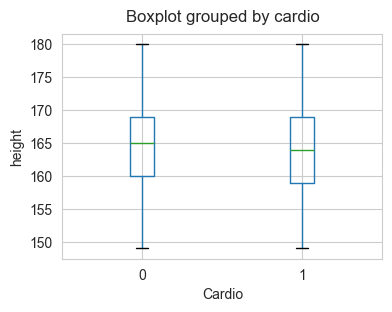

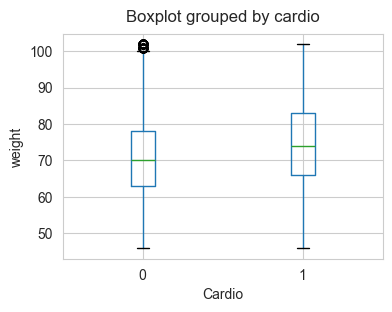

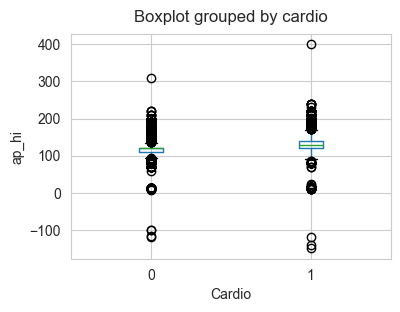

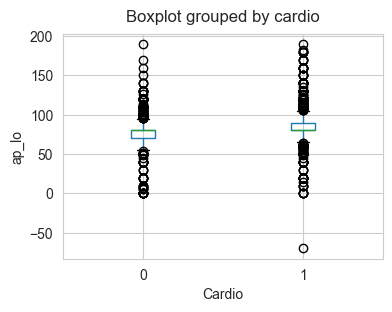

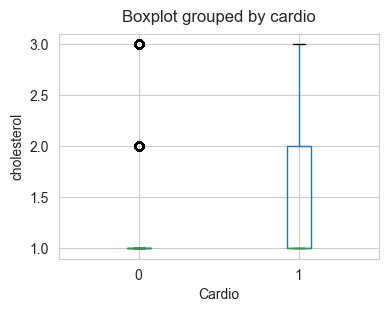

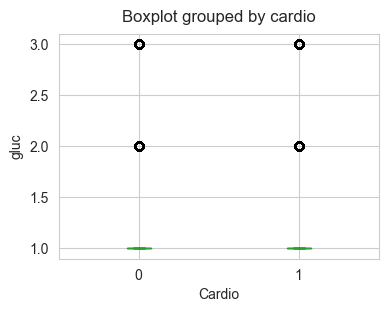

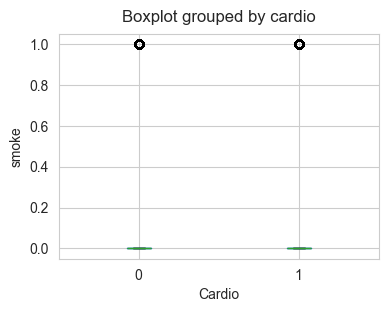

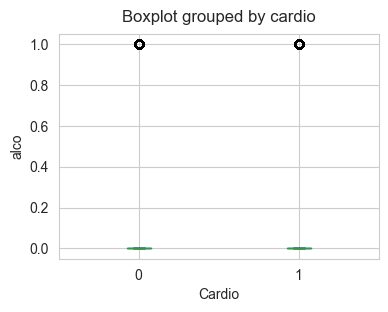

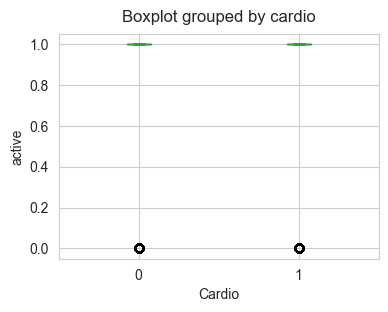

In [307]:
def plot_boxplots(df):
    for col in df.columns[:-1]:
      # Create a new figure for each boxplot
      df.boxplot(column=col, by='cardio', figsize=(4, 3))
      plt.title('')
      plt.xlabel("Cardio")
      plt.ylabel(col)
      plt.grid(True)
      plt.show()
        
plot_boxplots(df_cleaned)

In [308]:
df = df_cleaned

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63661 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          63661 non-null  int64  
 1   gender       63661 non-null  int64  
 2   height       63661 non-null  int64  
 3   weight       63661 non-null  float64
 4   ap_hi        63661 non-null  int64  
 5   ap_lo        63661 non-null  int64  
 6   cholesterol  63661 non-null  int64  
 7   gluc         63661 non-null  int64  
 8   smoke        63661 non-null  int64  
 9   alco         63661 non-null  int64  
 10  active       63661 non-null  int64  
 11  cardio       63661 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 8.3 MB


In [310]:
df['cardio'].value_counts()

cardio
0    32629
1    31032
Name: count, dtype: int64

In [311]:
x = df.iloc[:, :-1]
y = df['cardio']

In [312]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


In [313]:
y.sample(5)

10148    0
10061    0
34294    1
13203    1
1274     1
Name: cardio, dtype: int64

Binning attributes age

Convert age from days to years and use bining method

In [314]:
# Convert age to years
df['age_year'] = df['age'] / 365

# Define bin edges and labels
bins = [1, 30, 35, 40, 45, 50, 55, 60, 65, float('inf')]
labels = [0, 1, 2, 3, 4, 5, 6, 7 ,8]

In [315]:
df['age_bin'] = pd.cut(df['age_year'], bins=bins, labels=labels, right=False)
print(df)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993  19699       1     172    70.0    130     90            1     1      0   
69994  21074       1     165    80.0    150     80            1     1      0   
69995  19240       2     168    76.0    120     80            1     1      1   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio   age_year 

Convert continuous values into categorical values and apply bining methods

Mean Arterial Pressure (MAP) = (2 Diastollic Blood Pressure + Sistolic Blood Pressure)/3

In [316]:
df['MAP'] = (2 * df['ap_lo'] + df['ap_hi']) / 3

In [317]:
# Define bin edges and labels
bins = [70, 80, 90, 100, 110, 120]
labels = [1, 2, 3, 4, 5]

In [318]:
df['MAP_class'] = pd.cut(df['MAP'], bins=bins, labels=labels, right=False)
print(df)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993  19699       1     172    70.0    130     90            1     1      0   
69994  21074       1     165    80.0    150     80            1     1      0   
69995  19240       2     168    76.0    120     80            1     1      1   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio   age_year 

Body Mass Index (BMI) = weight (kg) / height² (m²)

In [319]:
df['BMI'] = df['weight'] / ((df['height']/100) ** 2)

In [320]:
# Define bin edges and labels
bins = [0, 15, 18.5, 25, 30, 35, float('inf')]
labels = [0, 1, 2, 3, 4, 5]

In [321]:
df['BMI_class'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)
print(df)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993  19699       1     172    70.0    130     90            1     1      0   
69994  21074       1     165    80.0    150     80            1     1      0   
69995  19240       2     168    76.0    120     80            1     1      1   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio   age_year 

In [322]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_bin,MAP,MAP_class,BMI,BMI_class
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,5,90.000000,3,21.967120,2
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,6,106.666667,4,34.927679,4
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,5,90.000000,3,23.507805,2
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,4,116.666667,5,28.710479,3
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,4,73.333333,1,23.011177,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,19699,1,172,70.0,130,90,1,1,0,0,1,1,53.969863,5,103.333333,4,23.661439,2
69994,21074,1,165,80.0,150,80,1,1,0,0,1,1,57.736986,6,103.333333,4,29.384757,3
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329,5,93.333333,3,26.927438,3
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795,7,98.333333,3,27.099251,3


In [323]:
columns_to_drop = ['age', 'age_year', 'MAP', 'BMI', 'weight', 'height', 'cholesterol', 'ap_hi', 'ap_lo', 'active']
df = df.drop(columns_to_drop, axis=1)

In [324]:
# Define the desired order of columns
new_order = ['gender', 'age_bin', 'BMI_class', 'MAP_class', 'gluc', 'smoke', 'alco', 'cardio']

df = df[new_order]
print(df)

       gender age_bin BMI_class MAP_class  gluc  smoke  alco  cardio
0           2       5         2         3     1      0     0       0
1           1       6         4         4     1      0     0       1
2           1       5         2         3     1      0     0       1
3           2       4         3         5     1      0     0       1
4           1       4         2         1     1      0     0       0
...       ...     ...       ...       ...   ...    ...   ...     ...
69993       1       5         2         4     1      0     0       1
69994       1       6         3         4     1      0     0       1
69995       2       5         3         3     1      1     0       0
69998       1       7         3         3     2      0     0       1
69999       1       6         2         3     1      0     0       0

[63661 rows x 8 columns]


Init: initializing centroids
Init: initializing clusters
Starting iterations...

/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)



Run 1, iteration: 1/100, moves: 0, cost: 60437.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 60437.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 60437.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 60437.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 60437.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters


/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Starting iterations...
Run 1, iteration: 1/100, moves: 6969, cost: 46304.0
Run 1, iteration: 2/100, moves: 2661, cost: 46304.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9014, cost: 46304.0
Run 2, iteration: 2/100, moves: 397, cost: 46304.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4935, cost: 46651.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5917, cost: 46651.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4578, cost: 47256.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters


/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Starting iterations...
Run 1, iteration: 1/100, moves: 2597, cost: 44031.0
Run 1, iteration: 2/100, moves: 422, cost: 44031.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7965, cost: 43311.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 7063, cost: 44213.0
Run 3, iteration: 2/100, moves: 2204, cost: 44213.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3227, cost: 45600.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4032, cost: 45687.0
Best run was number 2
Init: initializing centroids


/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4020, cost: 41599.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 41045.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9629, cost: 40871.0
Run 3, iteration: 2/100, moves: 1473, cost: 40871.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3249, cost: 45496.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4045, cost: 42843.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters


/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Starting iterations...
Run 1, iteration: 1/100, moves: 1003, cost: 38312.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2630, cost: 42372.0
Run 2, iteration: 2/100, moves: 1189, cost: 41706.0
Run 2, iteration: 3/100, moves: 69, cost: 41706.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5767, cost: 38746.0
Run 3, iteration: 2/100, moves: 686, cost: 38746.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5004, cost: 37948.0
Run 4, iteration: 2/100, moves: 759, cost: 37948.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 7871, cost: 40293.0
Best run was number 4


/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


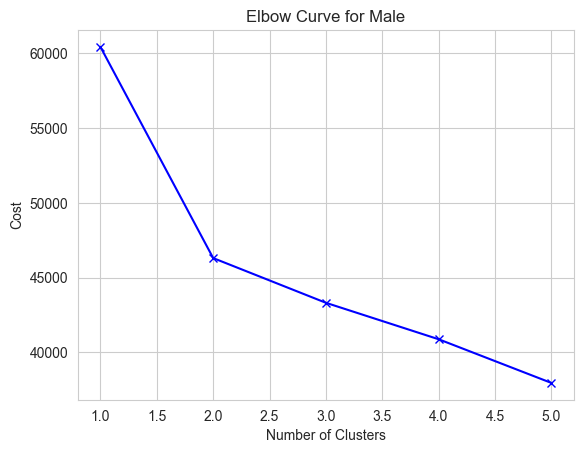

/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 107524.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 107524.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 107524.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 107524.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 107524.0
Best run was number 1


/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 87295.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3519, cost: 86011.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 11810, cost: 84277.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 10066, cost: 81641.0
Run 4, iteration: 2/100, moves: 151, cost: 81641.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 7374, cost: 84277.0
Best run was number 4


/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7964, cost: 79076.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5262, cost: 75172.0
Run 2, iteration: 2/100, moves: 1458, cost: 75172.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 17148, cost: 79032.0
Run 3, iteration: 2/100, moves: 3345, cost: 79032.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 12210, cost: 76989.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 14479, cost: 77327.0
Best run was number 2


/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 14418, cost: 72280.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 16134, cost: 73945.0
Run 2, iteration: 2/100, moves: 3203, cost: 73945.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6224, cost: 74739.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 14968, cost: 71244.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 592, cost: 71901.0
Best run was number 4


/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13533, cost: 66474.0
Run 1, iteration: 2/100, moves: 10486, cost: 66474.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6022, cost: 65689.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 18382, cost: 67120.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 13378, cost: 67163.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 8383, cost: 67150.0
Best run was number 2


/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


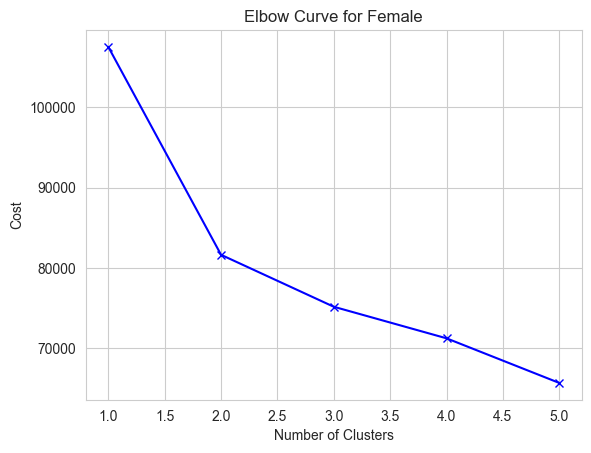

In [325]:
import pandas as pd
from kmodes.kmodes import KModes

def kmodes_by_gender(data, gender):
  cost = []
  for num_clusters in range(1, 6):
      kmode = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1)
      kmode.fit_predict(data)
      cost.append(kmode.cost_)

  plt.plot(range(1, 6), cost, marker='x', color='blue')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Cost')
  plt.title(f'Elbow Curve for {gender}')
  plt.show()

  # Add cluster labels to the data for this gender
  data['cluster'] = kmode.labels_
  return data

# Split the data by gender
female_data = df[df['gender'] == 1]
male_data = df[df['gender'] == 2]

# Select relevant categorical columns for clustering
male_features = male_data[:]
female_features = female_data[:]

# Perform KModes clustering for males and females
clustered_males = kmodes_by_gender(male_features.copy(), 'Male')
clustered_females = kmodes_by_gender(female_features.copy(), 'Female')

# Combine the clustered DataFrames
df_clustered = pd.concat([clustered_males, clustered_females])

In [326]:
df = df_clustered

In [327]:
# Define the desired order of columns
new_order = ['cluster','gender', 'age_bin', 'BMI_class', 'MAP_class', 'gluc', 'smoke', 'alco', 'cardio']

# Reorder the columns
df = df[new_order]
print(df)

       cluster  gender age_bin BMI_class MAP_class  gluc  smoke  alco  cardio
0            4       2       5         2         3     1      0     0       0
3            1       2       4         3         5     1      0     0       1
7            2       2       7         3         4     3      0     0       1
11           4       2       5         2         3     1      0     0       0
12           0       2       3         2         3     1      0     0       0
...        ...     ...     ...       ...       ...   ...    ...   ...     ...
69992        3       1       5         2         5     1      0     0       1
69993        1       1       5         2         4     1      0     0       1
69994        1       1       6         3         4     1      0     0       1
69998        3       1       7         3         3     2      0     0       1
69999        0       1       6         2         3     1      0     0       0

[63661 rows x 9 columns]


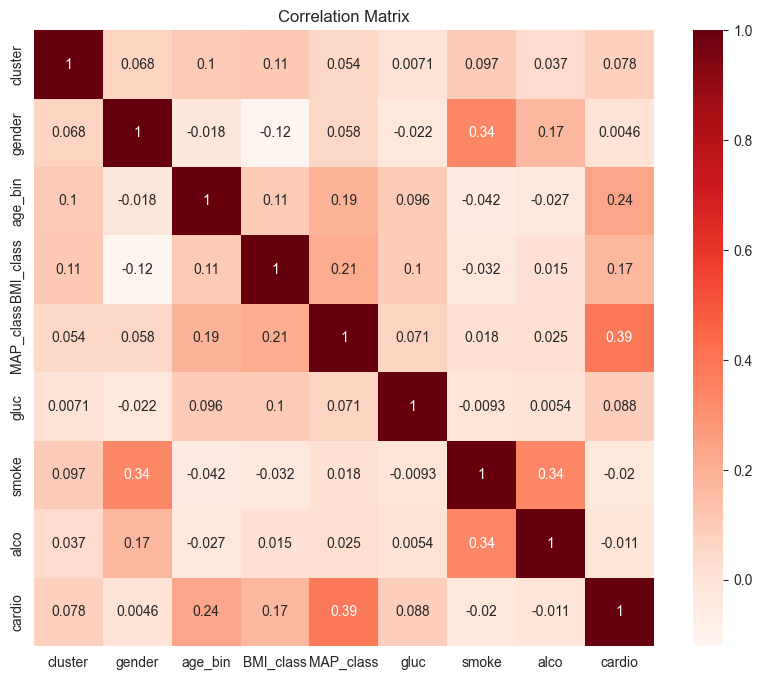

In [328]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

Split data 80:20

In [329]:
x = df.iloc[:,0:8]
y = df['cardio']

In [330]:
x.head()

,cluster,gender,age_bin,BMI_class,MAP_class,gluc,smoke,alco
0,4,2,5,2,3,1,0,0
3,1,2,4,3,5,1,0,0
7,2,2,7,3,4,3,0,0
11,4,2,5,2,3,1,0,0
12,0,2,3,2,3,1,0,0


In [331]:
print(y.sample(5))

4233     1
23822    1
33844    0
7671     1
10429    1
Name: cardio, dtype: int64


In [332]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x ,y , test_size=0.2)
# Split train and test into 80:20

In [333]:
X_train.shape

(50928, 8)

In [334]:
y_train.shape

(50928,)

In [335]:
x_test.shape

(12733, 8)

In [336]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create XGBoost DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Set parameters
params = {
    'max_depth': 4,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
}

# Perform 10-fold cross-validation
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    nfold=10,
    early_stopping_rounds=10,
    metrics={'auc'},
    as_pandas=True
)

# Find the best number of boosting rounds
best_num_boost_round = cv_results['test-auc-mean'].idxmax()

# Print the best number of boosting rounds and corresponding AUC
print(f"Best num_boost_round: {best_num_boost_round}")
print(f"Best test-auc-mean: {cv_results['test-auc-mean'].max()}")

# Train the final model with the best number of boosting rounds
best_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=best_num_boost_round
)

# Make predictions on the test set
y_pred_probas = best_model.predict(dtest)

# Evaluate the model
from sklearn.metrics import roc_auc_score
y_pred_probas = best_model.predict(dtest)
auc_score = roc_auc_score(y_test, y_pred_probas)
print(f"Test AUC Score: {auc_score}")


Best num_boost_round: 99
Best test-auc-mean: 0.9711494192608704
Test AUC Score: 0.9712791651673548


Confusion Matrix:
[[6209  410]
 [ 859 5255]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6619
           1       0.93      0.86      0.89      6114

    accuracy                           0.90     12733
   macro avg       0.90      0.90      0.90     12733
weighted avg       0.90      0.90      0.90     12733



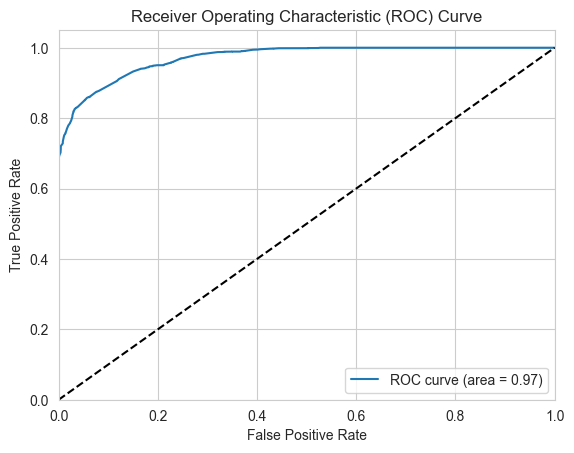

In [337]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities for the positive class
y_pred_probas = best_model.predict(dtest)

# Convert probabilities to binary class predictions using a threshold
threshold = 0.5
y_pred_classes = (y_pred_probas >= threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# ROC Curve and AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probas)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [338]:
# Get prediction probabilities
y_pred_proba = best_model.predict(dtest)

# Extract confidence scores (assuming binary classification)
confidence_scores = y_pred_proba[:]

In [339]:
# confidence_scores = np.max(y_pred_proba, axis=1)

results_with_true = np.column_stack((y_test, y_pred_classes, confidence_scores))

print("\nTrue Class | Predicted Class | Confidence Score")
print("-----------|-----------------|----------------")
for row in results_with_true:
    print(f"{int(row[0])}          | {int(row[1])}               | {row[2]:.4f}")



True Class | Predicted Class | Confidence Score
-----------|-----------------|----------------
1          | 1               | 0.9620
1          | 1               | 0.9981
1          | 1               | 0.7931
0          | 0               | 0.1083
0          | 0               | 0.1795
0          | 0               | 0.1627
0          | 0               | 0.0004
0          | 0               | 0.0548
1          | 1               | 0.7600
1          | 1               | 0.9968
0          | 0               | 0.1357
1          | 1               | 0.7996
0          | 0               | 0.0138
0          | 0               | 0.1453
1          | 1               | 0.9777
1          | 1               | 0.9982
0          | 0               | 0.2700
1          | 1               | 0.9783
1          | 1               | 0.7996
1          | 1               | 0.9911
0          | 0               | 0.0519
0          | 0               | 0.0003
0          | 0               | 0.0004
1          | 1               |

In [340]:
import pandas as pd

results_df = pd.DataFrame(results_with_true, columns=['True Class', 'Predicted Class', 'Confidence Score'])
print("\nResults DataFrame:")
print(results_df)


Results DataFrame:
       True Class  Predicted Class  Confidence Score
0             1.0              1.0          0.962020
1             1.0              1.0          0.998115
2             1.0              1.0          0.793149
3             0.0              0.0          0.108300
4             0.0              0.0          0.179463
...           ...              ...               ...
12728         0.0              0.0          0.000713
12729         0.0              0.0          0.041529
12730         0.0              0.0          0.011956
12731         1.0              0.0          0.475549
12732         1.0              1.0          0.724588

[12733 rows x 3 columns]


In [341]:
# Calculate quartiles
quartiles = results_df['Confidence Score'].quantile([0.25, 0.5, 0.75])

print("\nQuartiles of Confidence Score:")
print(quartiles)


Quartiles of Confidence Score:
0.25    0.068017
0.50    0.406069
0.75    0.973565
Name: Confidence Score, dtype: float64


In [342]:
import pandas as pd
import numpy as np

def categorize_predictions(y_pred_classes, confidence_scores):

    risk_categories = []

    for i in range(len(y_pred_classes)):
        if y_pred_classes[i] == 1:    # Class 1
            risk_categories.append('Has CVD')
        elif y_pred_classes[i] == 0:  # Class 0
            class0_prob = confidence_scores[i]  # Probability of class 0

            if class0_prob < 0.06:
                risk_categories.append('High Risk')
            elif 0.06 <= class0_prob < 0.9:
                risk_categories.append('Low Risk')
            else:
                risk_categories.append('No Risk')

    return pd.Series(risk_categories)

categorized_predictions = categorize_predictions(y_pred_classes, confidence_scores)

print(categorized_predictions)

0          Has CVD
1          Has CVD
2          Has CVD
3         Low Risk
4         Low Risk
           ...    
12728    High Risk
12729    High Risk
12730    High Risk
12731     Low Risk
12732      Has CVD
Length: 12733, dtype: object


In [352]:
results_with_true = np.column_stack((y_test, y_pred_classes, confidence_scores, categorized_predictions))

print("\nTrue Class | Predicted Class | Confidence Score Class 0 | Risk")
print("-----------|-----------------|--------------------------|----------------")
for row in results_with_true:
    print(f"{int(row[0])}          | {int(row[1])}               | {row[2]:.4f}                   | {row[3]:}")


True Class | Predicted Class | Confidence Score Class 0 | Risk
-----------|-----------------|--------------------------|----------------
1          | 1               | 0.9620                   | Has CVD
1          | 1               | 0.9981                   | Has CVD
1          | 1               | 0.7931                   | Has CVD
0          | 0               | 0.1083                   | Low Risk
0          | 0               | 0.1795                   | Low Risk
0          | 0               | 0.1627                   | Low Risk
0          | 0               | 0.0004                   | High Risk
0          | 0               | 0.0548                   | High Risk
1          | 1               | 0.7600                   | Has CVD
1          | 1               | 0.9968                   | Has CVD
0          | 0               | 0.1357                   | Low Risk
1          | 1               | 0.7996                   | Has CVD
0          | 0               | 0.0138                   | High

In [348]:
df = pd.DataFrame({'Predicted Class': y_pred_classes,
                   'Confidence Score': confidence_scores,
                   'Risk Category': categorized_predictions})

df.to_csv('CVD_riskprediction.csv', index=False) # index=False prevents saving the index column.

In [343]:
# Save the trained model and scaler
import pickle
with open('Model/CVD_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [344]:
test_data = pd.read_csv("Dataset/healthCheckup_CVD.csv")

In [345]:
with open('Model/CVD_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [351]:
print(ids.head(20))

0      0
1      1
2      2
3      3
4      4
5      8
6      9
7     12
8     13
9     14
10    15
11    16
12    18
13    21
14    23
15    24
16    25
17    27
18    28
19    29
Name: id, dtype: int64
